# Example for partitioning the scope of the AeroMAPS scenario using AeroSCOPE data

This notebook serves as an example for producing analyses on a reduced scope (e.g. regional) using AeroSCOPE data.

## 1. Generation of a corrected input file for the studied scope

Base values for calibrating a scenario can be obtained using [AeroSCOPE](www.aeromaps.eu/aeroscope).
The file is downloaded from the "AeroMAPS Export" tab, using the available filtering options. 

**Please refer to [AeroSCOPE description](https://github.com/AeroMAPS/AeroSCOPE) to understand the limitaions of the tool.**
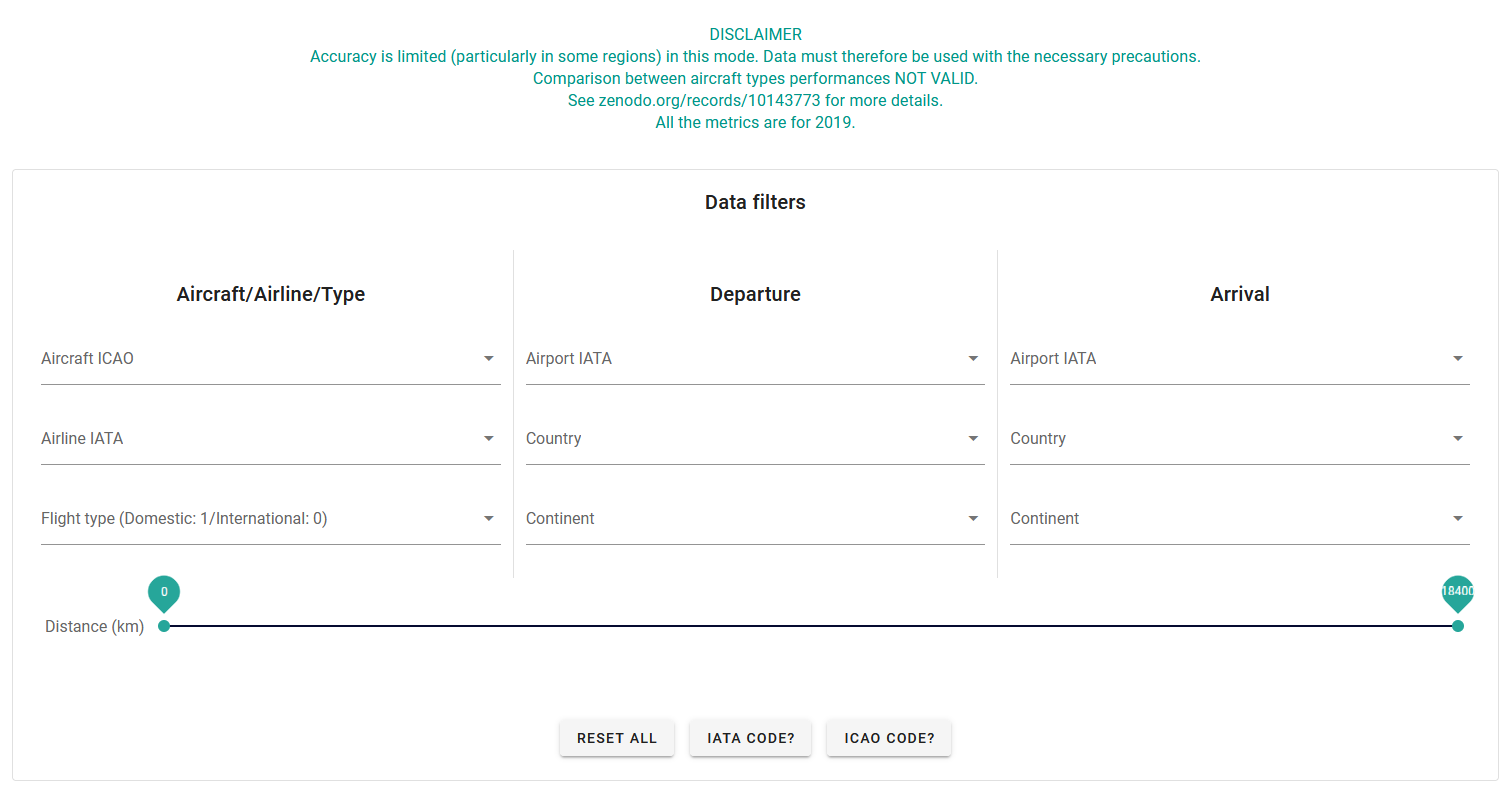

Click on "Download File" to generate the input files for 2019, and place the *.csv* file in data_partitioning folder as below. This folder is used to store the calibration *.csv*, but also a custom input file.

Here, an example is provided considering domestic and international flights departing from France (overseas not included). 
A dedicated function of AeroMAPS calibrates historical parameters by calibrating AeroMAPS values using AeroSCOPE partitionned file.  
A set of transformations is necessary to match a similar coverage as AeroSCOPE does not cover dedicated cargo flights. 

**⚠ Historical values are calibrated based on the comparision of AeroSCOPE 2019 values with AeroMAPS 2019 reference. Historical trajectories (RPK, energy consumption, emissions, ...) are scaled using this ratio and are NOT REPRESENTATIVE of actual historical values for the partition made, which can result in significant differences, in particular for climate models ⚠**

In [1]:
from aeromaps.utils.functions import create_partitioning

In [2]:
create_partitioning(file="data_partitioning/aeroscope_france_data.csv", path="data_partitioning")

## 2. Run AeroMAPS on this studied scope

In [3]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_efficiency_bottom_up,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
)

In [4]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
}

Create process as usual, the partitionning is recuperated as specified in the config file.

In [5]:
process = create_process(configuration_file="data_partitioning/config.json", models=models)

In [6]:
process.compute()

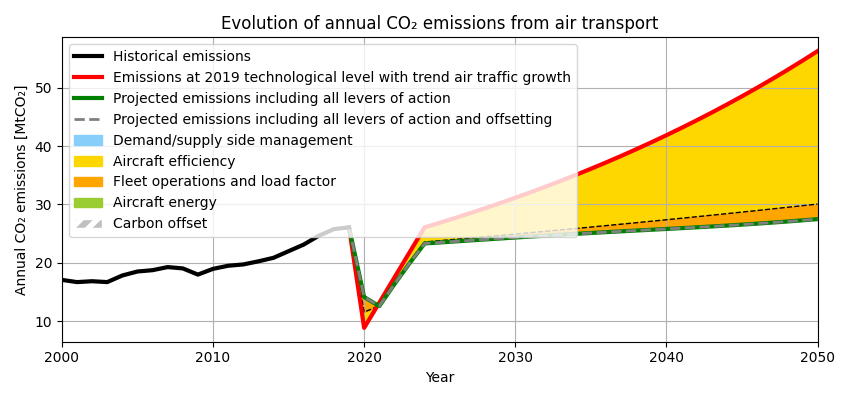

In [7]:
process.plot("air_transport_co2_emissions", save=False)